In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import pyaldata as pyd
import scipy
from utils import *
from tools import * 
import warnings
import os
import seaborn as sns

# Load data

In [48]:
dataset = 'M027_2024_03_20_11_30'
mouse_id = 'M027'

In [49]:
data_dir = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'
fname = os.path.join(data_dir, dataset+'_pyaldata.mat')

In [50]:
df = pyd.mat2dataframe(fname, shift_idx_fields=False, td_name='df')

df['bin_size'] = 0.01

df = pyd.remove_low_firing_neurons(df, "m1_spikes",  1)
df = pyd.remove_low_firing_neurons(df, "s1_spikes", 1)
df = pyd.remove_low_firing_neurons(df, "str_motor_spikes",  1)
df = pyd.remove_low_firing_neurons(df, "str_sensor_spikes", 1)

df = pyd.transform_signal(df, "m1_spikes",  'sqrt')
df = pyd.transform_signal(df, "s1_spikes", 'sqrt')
df = pyd.transform_signal(df, "str_motor_spikes",  'sqrt')
df = pyd.transform_signal(df, "str_sensor_spikes", 'sqrt')

df = pyd.add_firing_rates(df,'smooth')

/home/cf620/miniconda3/envs/quake/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


field sol_nb could not be converted to int.


/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/cf620/git/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


In [51]:
df.head()

,trial_id,event_time,sol_nb,sol_direction,perturbation_bin,trialType,m1_spikes,str_motor_spikes,s1_spikes,str_sensor_spikes,...,tail_base_pos,tail_middle_pos,tail_tip_pos,left_wrist_pos,right_wrist_pos,bin_size,m1_rates,str_motor_rates,s1_rates,str_sensor_rates
0,0,NaN,NaN,NaN,NaN,spontaneous,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 1.4142135623730951, 1.4142135623730951,...","[[0.0, 1.0, 1.7320508075688772, 0.0, 0.0, 0.0,...",...,"[[2.371881478133181, 9.834912135525752, 162.47...","[[-4.708653361786309, 18.223496601081845, 136....","[[-16.31521745638187, 26.631384805794248, 109....","[[23.54583734813956, 2.3208134581454947, 186.6...","[[24.45877978081504, 7.722517164430324, 184.92...",0.01,"[[0.0, 0.0, 0.0, 0.021426776, 0.0, 18.370544, ...","[[0.00012739658, 0.0, 0.21731372, 0.0, 2.76065...","[[0.0, 155.06972, 80.31046, 18.255411, 0.0, 0....","[[37.85257, 92.336464, 184.8437, 48.956696, 64..."
1,1,303008.0,3,120.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 1.7320508075688772, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 1.4142135623730951, 1.4142135623730951,...",...,"[[-5.7958174417989765, 9.159049676735082, 165....","[[-18.95539961249535, 19.6673093645573, 143.90...","[[-21.674306132000293, 32.9957579351878, 115.5...","[[20.90323948009835, 6.176627796508647, 185.89...","[[23.96460304644611, 7.861046670322029, 183.75...",0.01,"[[16.210604, 8.749083, 0.0, 0.0, 0.0, 10.62355...","[[0.0, 0.0, 28.853209, 14.980366, 0.4696169, 0...","[[0.0, 136.73666, 92.709915, 20.432865, 0.0, 0...","[[69.35967, 127.995544, 185.7783, 35.169422, 4..."
2,2,306530.0,3,120.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[[-5.735753033674915, 9.199426675471864, 165.0...","[[-18.90360627048568, 19.75330553798869, 143.9...","[[-21.865865364171764, 33.085959654309455, 115...","[[20.76862038154947, 6.133083013525207, 185.84...","[[23.9237238961752, 7.866733311024275, 183.848...",0.01,"[[20.822346, 0.0, 0.0, 0.0, 6.947399, 8.751187...","[[0.0, 8.749083, 0.0021049092, 8.156546, 0.0, ...","[[0.0, 77.55328, 26.469517, 16.221012, 0.0, 13...","[[30.955505, 23.775017, 107.41596, 23.755856, ..."
3,3,312221.0,0,300.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.4142135623730951, 1.0, 1.4142135623730951,...",...,"[[-5.7104553239790405, 9.208956756894125, 165....","[[-18.916026880885365, 19.73957352644042, 143....","[[-21.931132630179413, 33.11036694180959, 115....","[[20.892706909670004, 6.117199003019518, 185.9...","[[23.946204082986053, 7.819063159587943, 183.9...",0.01,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.15350212, 6.94829...","[[0.0, 0.00036845426, 0.338129, 0.00012739658,...","[[0.0, 139.01924, 96.90578, 12.363387, 7.41701...","[[97.90133, 105.18515, 180.19489, 49.37949, 77..."
4,4,322143.0,0,300.0,100.0,perturbation,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 2.0, 1.7320508075688772, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.4142135623730951, 0.0, 0.0, 0.0,...",...,"[[-5.702218704669909, 9.206101841373826, 165.1...","[[-18.98532178158292, 19.639348749242007, 143....","[[-21.868097613386, 33.060978549873035, 115.69...","[[20.8728621429292, 6.119426257082047, 185.929...","[[23.96251297059661, 7.823874364794402, 183.98...",0.01,"[[8.073755, 6.947399, 0.0, 0.0, 0.0, 7.4170165...","[[0.0, 1.8789068, 0.0, 0.0, 0.00036845426, 0.0...","[[0.0, 137.43158, 150.6123, 21.562807, 0.0, 0....","[[47.866302, 93.22669, 189.73972, 39.06928, 77..."


# Count the number of perturbations

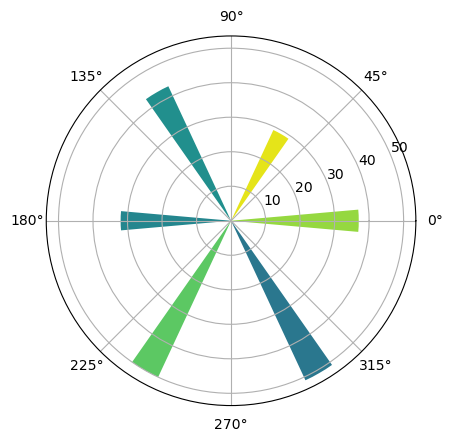

In [52]:

# Define the number of bins or directions you want to have
num_bins = 36  # For example, this would give bins of 10 degrees each (360/36)

# Compute the histogram
counts, edges = np.histogram(df['sol_direction'], bins=num_bins, range=(0, 360))

# Calculate the width of each bin in radians
width = (2 * np.pi) / num_bins

# Calculate the angles for each bin
angles = np.linspace(0, 2 * np.pi, num_bins, endpoint=False)

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'polar': True})

# Plot each direction with a different color
# Use the 'bar' method for a histogram-like representation
bars = ax.bar(angles, counts, width=width, bottom=0.0)

# Assign a different color to each bar
for bar in bars:
    bar.set_facecolor(plt.cm.viridis(np.random.rand()))

#ax.grid(False)
plt.savefig('./probe_analysis/polar_plots/polar_plot_'+dataset+'.pdf')

plt.show()

# Dimensionality

In [53]:
m1_spikes = pyd.concat_trials(df[1:-1], 'm1_rates')
str_motor_spikes = pyd.concat_trials(df[1:-1], 'str_motor_rates')
s1_spikes = pyd.concat_trials(df[1:-1], 's1_rates')
str_sensor_spikes = pyd.concat_trials(df[1:-1], 'str_sensor_rates')

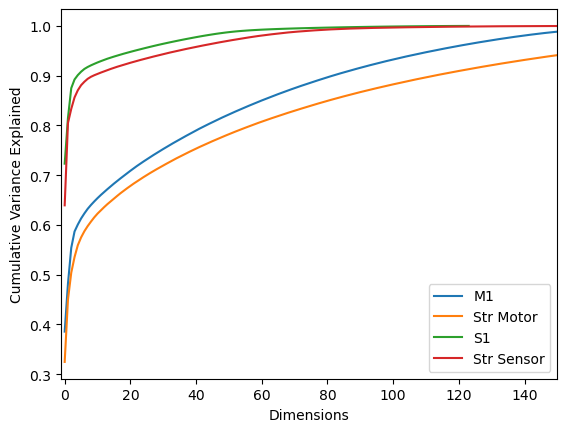

In [57]:
regions = [m1_spikes, str_motor_spikes, s1_spikes, str_sensor_spikes]
region_names = ["M1", "Str Motor", "S1", "Str Sensor"]

# Plotting the mean firing rate distribution


for i, rates in enumerate(regions):
    cum_sum = cum_variance_pca(rates)
    plt.plot(cum_sum, label=region_names[i])
    plt.xlabel('Dimensions')
    plt.ylabel('Cumulative Variance Explained')
    plt.xlim([-1,150])
plt.legend()

plt.savefig('./probe_analysis/dimensionality/variance_explained_'+dataset+'.pdf')


# Dimensionality spontaneous vs perturbation

field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.


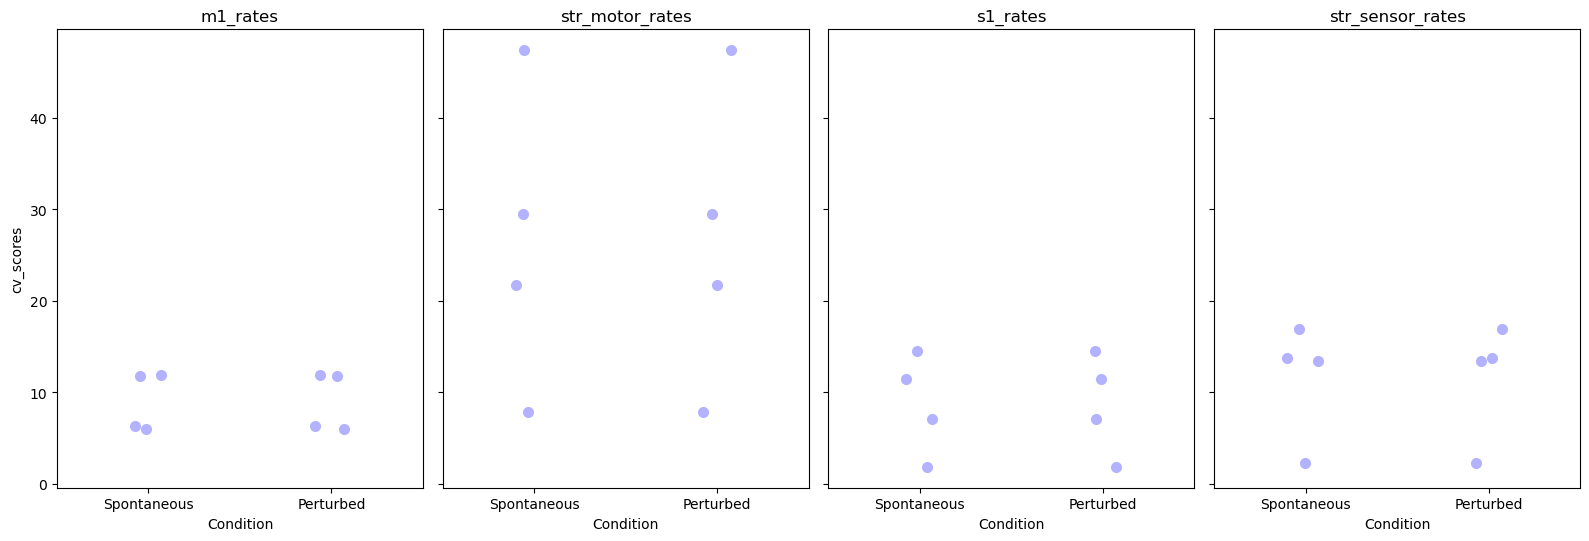

In [5]:
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

# Example input fields
input_fields = ["m1_rates", "str_motor_rates", "s1_rates", "str_sensor_rates"]

# Example dataset and mouse_id pairs
dataset_mouse_pairs = [
    ('M030_2024_04_11_17_00', 'M030'),
    ('M030_2024_04_12_09_40', 'M030'),
    ('M027_2024_03_20_11_30', 'M027'),
    ('M033_2024_04_11_08_22', 'M033')
]

# Store results
results = {field: {'Spontaneous': [], 'Perturbed': []} for field in input_fields}

for dataset, mouse_id in dataset_mouse_pairs:
    df = process_data(dataset, mouse_id)
    df_perturbed = df[df['trialType'] == 'perturbation']
    df_spontaneous = df[df['trialType'] == 'spontaneous']
    
    for input_field in input_fields:
        X_perturbed = pyd.concat_trials(df_perturbed, input_field)

        dimensionality_perturbed = pca_pr(X_perturbed)
        results[input_field]['Perturbed'].append(dimensionality_perturbed)

        X_spontaneous = pyd.concat_trials(df_spontaneous, input_field)

        dimensionality_spontaneous = pca_pr(X_perturbed)
        results[input_field]['Spontaneous'].append(dimensionality_spontaneous)

# Plot the performance comparison
fig, axes = plt.subplots(nrows=1, ncols=len(input_fields), figsize=(16, 6), sharey=True)
axes = axes.flatten()

for i, input_field in enumerate(input_fields):
    data = pd.DataFrame({
        'cv_scores': results[input_field]['Spontaneous'] + results[input_field]['Perturbed'],
        'Condition': ['Spontaneous'] * len(results[input_field]['Spontaneous']) + ['Perturbed'] * len(results[input_field]['Perturbed'])
    })
    sns.stripplot(data=data, x='Condition', y='cv_scores', s=8, alpha=0.3, color='blue', ax=axes[i])
    axes[i].set_title(input_field)

#plt.suptitle(f"Performance Comparison for {region}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('./probe_analysis/dimensionality/spontaneous_vs_perturbed.pdf')
plt.show()

In [2]:
def split_rates(row):
    # Extract the matrices
    str_motor_rates = row['str_motor_rates']
    m1_rates = row['m1_rates']
    str_sensor_rates = row['str_sensor_rates']
    s1_rates = row['s1_rates']
    
    # Split each matrix into before, during, and after periods
    str_motor_rates_before = str_motor_rates[:95, :]
    str_motor_rates_during = str_motor_rates[95:115, :]
    str_motor_rates_after = str_motor_rates[115:200, :]
    
    m1_rates_before = m1_rates[:95, :]
    m1_rates_during = m1_rates[95:115, :]
    m1_rates_after = m1_rates[115:200, :]
    
    str_sensor_rates_before = str_sensor_rates[:95, :]
    str_sensor_rates_during = str_sensor_rates[95:115, :]
    str_sensor_rates_after = str_sensor_rates[115:200, :]
    
    s1_rates_before = s1_rates[:95, :]
    s1_rates_during = s1_rates[95:115, :]
    s1_rates_after = s1_rates[115:200, :]
    
    return pd.Series({
        'str_motor_rates_before': str_motor_rates_before,
        'str_motor_rates_during': str_motor_rates_during,
        'str_motor_rates_after': str_motor_rates_after,
        'm1_rates_before': m1_rates_before,
        'm1_rates_during': m1_rates_during,
        'm1_rates_after': m1_rates_after,
        'str_sensor_rates_before': str_sensor_rates_before,
        'str_sensor_rates_during': str_sensor_rates_during,
        'str_sensor_rates_after': str_sensor_rates_after,
        's1_rates_before': s1_rates_before,
        's1_rates_during': s1_rates_during,
        's1_rates_after': s1_rates_after
    })

field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.


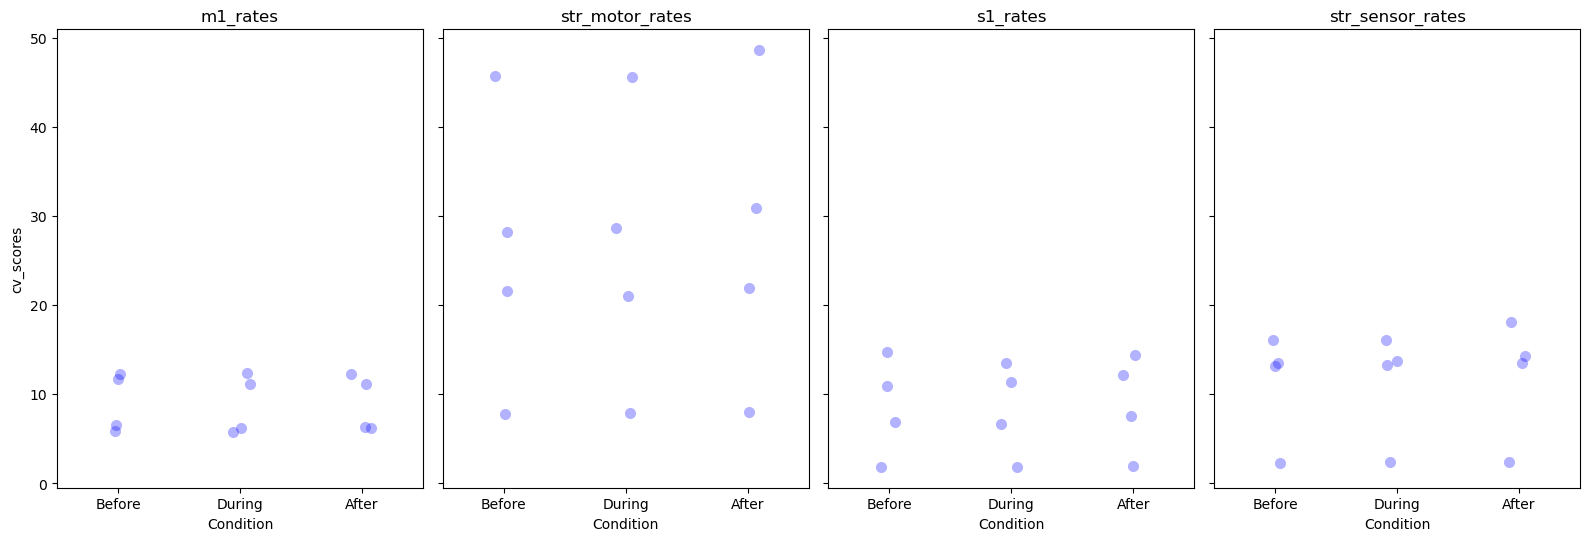

In [4]:
warnings.filterwarnings('ignore')

# Example input fields
input_fields = ["m1_rates", "str_motor_rates", "s1_rates", "str_sensor_rates"]

# Example dataset and mouse_id pairs
dataset_mouse_pairs = [
    ('M030_2024_04_11_17_00', 'M030'),
    ('M030_2024_04_12_09_40', 'M030'),
    ('M027_2024_03_20_11_30', 'M027'),
    ('M033_2024_04_11_08_22', 'M033')
]

# Store results
results = {field: {'Before': [], 'During': [], 'After':[]} for field in input_fields}

for dataset, mouse_id in dataset_mouse_pairs:
    df = process_data(dataset, mouse_id)
    df_perturbed = df[df['trialType'] == 'perturbation']

    # Apply the function to each row
    df_split = df_perturbed.apply(split_rates, axis=1)

    # Concatenate the new columns to the original dataframe
    df_perturbed = pd.concat([df_perturbed, df_split], axis=1)
    
    for input_field in input_fields:
        before_rates = pyd.concat_trials(df_perturbed, input_field+'_before')

        dimensionality_before = pca_pr(before_rates)
        results[input_field]['Before'].append(dimensionality_before)

        during_rates = pyd.concat_trials(df_perturbed, input_field+'_during')

        dimensionality_during = pca_pr(during_rates)
        results[input_field]['During'].append(dimensionality_during)

        after_rates = pyd.concat_trials(df_perturbed, input_field+'_after')

        dimensionality_after = pca_pr(after_rates)
        results[input_field]['After'].append(dimensionality_after)

       

# Plot the performance comparison
fig, axes = plt.subplots(nrows=1, ncols=len(input_fields), figsize=(16, 6), sharey=True)
axes = axes.flatten()

for i, input_field in enumerate(input_fields):
    data = pd.DataFrame({
        'cv_scores': results[input_field]['Before'] + results[input_field]['During'] + results[input_field]['After'],
        'Condition': ['Before'] * len(results[input_field]['Before']) + ['During'] * len(results[input_field]['During']) + ['After'] * len(results[input_field]['After'])
    })
    sns.stripplot(data=data, x='Condition', y='cv_scores', s=8, alpha=0.3, color='blue', ax=axes[i])
    axes[i].set_title(input_field)

#plt.suptitle(f"Performance Comparison for {region}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('./probe_analysis/dimensionality/dimensionality_phases_perturbation.pdf')
plt.show()

In [10]:
df_perturbed['str_motor_rates_after'][1].shape

(85, 249)